In [1]:
import pandas as pd
import statsmodels.api as sm
from math import pi, sin, cos
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# reading data
data = pd.read_csv('VisitData.txt', delim_whitespace=True, header=0)

print (' data head')
print (data.head())

print ('data description')
print (data.describe())

 data head
   hour  count
0     1      0
1     2      3
2     3      6
3     4      2
4     5      5
data description
             hour       count
count  336.000000  336.000000
mean   168.500000    5.735119
std     97.139076    3.286074
min      1.000000    0.000000
25%     84.750000    3.000000
50%    168.500000    5.000000
75%    252.250000    8.000000
max    336.000000   16.000000


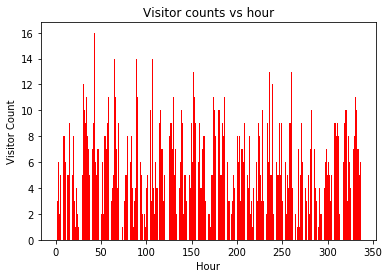

In [3]:
# plotting hour vs count data

plt.bar(data['hour'], data['count'],color='r')
plt.title('Visitor counts vs hour')
plt.xlabel('Hour')
plt.ylabel('Visitor Count')
plt.show()


In [4]:
# in data hours are incremented in everyday
# however, time series data have generally cycles so we need to transform hour column into hour in a day
data['hourofday'] = data['hour'].apply(lambda x: ((x - 1) % 24) + 1)

print (data.head())

   hour  count  hourofday
0     1      0          1
1     2      3          2
2     3      6          3
3     4      2          4
4     5      5          5


In [5]:
# plotting histogram which is grouped by according to hourofday
totalVisit = np.zeros(24)
for index, row in data.iterrows():
    totalVisit[row['hourofday'] - 1] = totalVisit[row['hourofday'] - 1] + row['count']


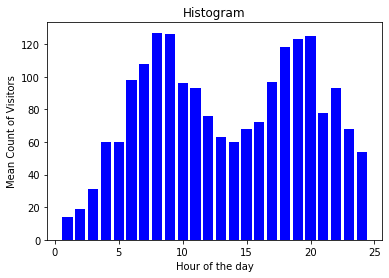

In [6]:
plt.bar(range(1, 25), totalVisit, color="blue")
plt.ylabel('Mean Count of Visitors')
plt.xlabel('Hour of the day')
plt.title('Histogram')
plt.show()

In [7]:
# from the bar chart, it can be said that there is a cycle
# we can convert hour data into frequency domain therefore we can handle cycles
data['w'] = data['hour'].apply(lambda h: (float(h) / 24) * 2 * pi)
# conversion to frequency domain
data['fdomain'] = data['w'].apply(lambda w: sin(w) + cos(w) + sin(2*w) + cos(2*w))

In [8]:
# applying poisson regression
# X
feat_cols = ['fdomain']
X = [elem for elem in data[feat_cols].values]

# adding costant to adding bias
X = sm.add_constant(X, prepend=False)
# Y
Y = [elem for elem in data['count'].values]
# building the model

In [9]:
poisson_mod = sm.Poisson(Y, X)
poisson_res = poisson_mod.fit()
print(poisson_res.summary())



Optimization terminated successfully.
         Current function value: 2.340728
         Iterations 5
                          Poisson Regression Results                          
Dep. Variable:                      y   No. Observations:                  336
Model:                        Poisson   Df Residuals:                      334
Method:                           MLE   Df Model:                            1
Date:                Tue, 12 Nov 2019   Pseudo R-squ.:                  0.1406
Time:                        10:20:37   Log-Likelihood:                -786.48
converged:                       True   LL-Null:                       -915.19
Covariance Type:            nonrobust   LLR p-value:                 6.323e-58
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2817      0.018    -15.239      0.000      -0.318      -0.245
const          1.6734      0.

In [10]:
# predicted vals
predVals = poisson_res.predict(X)

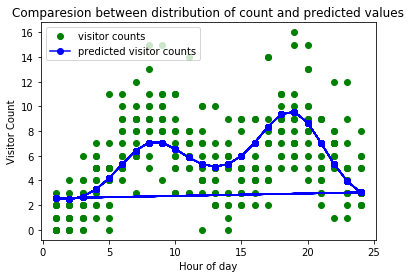

In [11]:
# plotting results
plt.plot(data['hourofday'], data['count'], 'go',label= 'visitor counts')
plt.plot(data['hourofday'], predVals, 'bo-',label= 'predicted visitor counts')
plt.legend()
plt.title('Comparesion between distribution of count and predicted values')
plt.xlabel('Hour of day')
plt.ylabel('Visitor Count')
plt.show()